# Week 13: Working with Time Series Data

 Time Series is a series of observations taken at specified time intervals usually equal intervals. Analysis of the series helps us to predict future values based on previous observed values. In Time series, we have only 2 variables, time & the variable we want to forecast.

In [15]:
import pandas as pd

# Create a DataFrame with the given data
data = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'Value': [10, 12, 16, 13, 17, 19, 15, 20, 22, 19, 21, 19]
}

df = pd.DataFrame(data)

# Calculate the 3-period moving average
df['3-period Moving Average'] = df['Value'].shift(1).rolling(window=3).mean()

# Print the result
print(df)


        Month  Value  3-period Moving Average
0     January     10                      NaN
1    February     12                      NaN
2       March     16                      NaN
3       April     13                12.666667
4         May     17                13.666667
5        June     19                15.333333
6        July     15                16.333333
7      August     20                17.000000
8   September     22                18.000000
9     October     19                19.000000
10   November     21                20.333333
11   December     19                20.666667


In [16]:
import pandas as pd

# Create a DataFrame with the given data
data = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'Value': [10, 12, 16, 13, 17, 19, 15, 20, 22, 19, 21, 19]
}

df = pd.DataFrame(data)

# Shift the values down by one row and then calculate the 3-period moving average
df['3-period Moving Average'] = df['Value'].shift(1).rolling(window=3).mean()

# Calculate error, absolute error, squared error, and absolute percent error
df['Error'] = df['3-period Moving Average'] - df['Value']
df['Absolute Error'] = df['Error'].abs()
df['Squared Error'] = df['Error'] ** 2
df['Absolute Percent Error'] = (df['Absolute Error'] / df['Value']) * 100

# Calculate MAD, MSE, and MAPE
mad = df['Absolute Error'].mean()
mse = df['Squared Error'].mean()
mape = df['Absolute Percent Error'].mean()

print(f"MAD: {mad}")
print(f"MSE: {mse}")
print(f"MAPE: {mape}")

# Print the result
df

MAD: 2.0000000000000004
MSE: 6.0740740740740735
MAPE: 10.60971459836269


,Month,Value,3-period Moving Average,Error,Absolute Error,Squared Error,Absolute Percent Error
0,January,10,NaN,NaN,NaN,NaN,NaN
1,February,12,NaN,NaN,NaN,NaN,NaN
2,March,16,NaN,NaN,NaN,NaN,NaN
3,April,13,12.666667,-0.333333,0.333333,0.111111,2.564103
4,May,17,13.666667,-3.333333,3.333333,11.111111,19.607843
5,June,19,15.333333,-3.666667,3.666667,13.444444,19.298246
6,July,15,16.333333,1.333333,1.333333,1.777778,8.888889
7,August,20,17.000000,-3.000000,3.000000,9.000000,15.000000
8,September,22,18.000000,-4.000000,4.000000,16.000000,18.181818
9,October,19,19.000000,0.000000,0.000000,0.000000,0.000000


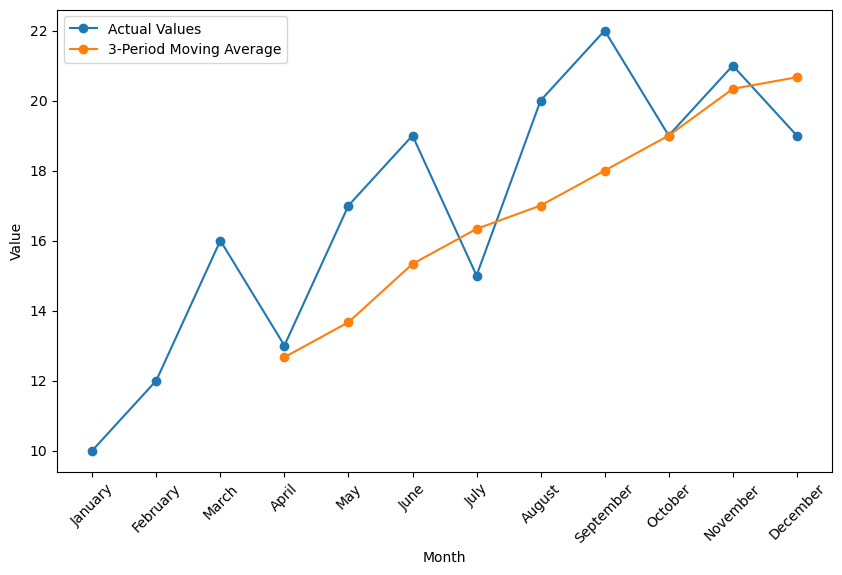

In [17]:
import matplotlib.pyplot as plt
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['Value'], label='Actual Values', marker='o')
plt.plot(df['Month'], df['3-period Moving Average'], label='3-Period Moving Average', marker='o')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.show()

# Making the visual Interactive with ipywidgets

The line import ipywidgets as widgets is importing the ipywidgets library and assigning it an alias of widgets.

ipywidgets is a library for creating interactive HTML widgets in Jupyter notebooks and the IPython kernel. It provides a set of GUI widgets such as sliders, dropdowns, buttons, and text boxes, that can be used to create interactive dashboards and other types of user interfaces.

By importing the library with the alias widgets, we can use the functions and classes provided by the library using the shorter name widgets. For example, in the code snippet you provided, widgets.Dropdown is used to create a dropdown widget.

In [ ]:
!pip install ipywidgets

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Create a function to plot the moving average with the selected k value
def plot_moving_average(k):
    clear_output(wait=True)

    df['Moving Average'] = df['Value'].rolling(window=k).mean()

    plt.figure(figsize=(10, 6))
    plt.plot(df['Month'], df['Value'], label='Actual Values', marker='o')
    plt.plot(df['Month'], df['Moving Average'], label=f'{k}-Period Moving Average', marker='o')
    plt.xticks(rotation=45)
    plt.xlabel('Month')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Create a dropdown widget to select the k value
k_dropdown = widgets.Dropdown(
    options=list(range(1, len(df))),
    value=3,
    description='k Value:',
)

# Update the plot when the k value is changed
widgets.interact(plot_moving_average, k=k_dropdown)


interactive(children=(Dropdown(description='k Value:', index=2, options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11), v…

<function __main__.plot_moving_average(k)>

# Enhancement to our Moving Average Method:<br /> Weighted Moving Average (MAPE: 12.20%)

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

# Create a DataFrame with the given data
data = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'Value': [10, 12, 16, 13, 17, 19, 15, 20, 22, 19, 21, 19]
}

df = pd.DataFrame(data)

# Define the weighted moving average function
def weighted_moving_average(k1, k2, k3):
    # Calculate the weighted moving average
    df['Weighted Moving Average'] = ((df['Value'].shift(1)*k3) + (df['Value'].shift(2)*k2) + (df['Value'].shift(3)*k1))/(k1+k2+k3)
    
    # Calculate error, absolute error, squared error, and absolute percent error
    df['Error'] = df['Weighted Moving Average'] - df['Value']
    df['Absolute Error'] = df['Error'].abs()
    df['Squared Error'] = df['Error'] ** 2
    df['Absolute Percent Error'] = (df['Absolute Error'] / df['Value']) * 100

    # Calculate MAD, MSE, and MAPE
    mad = df['Absolute Error'].mean()
    mse = df['Squared Error'].mean()
    mape = df['Absolute Percent Error'].mean()

    print(f"MAD: {mad}")
    print(f"MSE: {mse}")
    print(f"MAPE: {mape}")

    # Plot the actual values and the forecast
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(df['Month'], df['Value'], label='Actual Values')
    ax.plot(df['Month'], df['Weighted Moving Average'], label='Forecast')
    ax.set_xlabel('Month')
    ax.set_ylabel('Value')
    ax.set_title('Weighted Moving Average')
    plt.xticks(rotation=45)
    ax.legend()
    plt.show()

# Create the interactive widget
interact(weighted_moving_average, k3=widgets.IntSlider(min=1,max=3,step=1,value=3),
         k2=widgets.IntSlider(min=1,max=3,step=1,value=2),
         k1=widgets.IntSlider(min=1,max=3,step=1,value=1));


interactive(children=(IntSlider(value=1, description='k1', max=3, min=1), IntSlider(value=2, description='k2',…

In [128]:
df

,Month,Value,Weighted Moving Average,Error,Absolute Error,Squared Error,Absolute Percent Error
0,January,10,NaN,NaN,NaN,NaN,NaN
1,February,12,NaN,NaN,NaN,NaN,NaN
2,March,16,NaN,NaN,NaN,NaN,NaN
3,April,13,13.666667,0.666667,0.666667,0.444444,5.128205
4,May,17,13.833333,-3.166667,3.166667,10.027778,18.627451
5,June,19,15.500000,-3.500000,3.500000,12.250000,18.421053
6,July,15,17.333333,2.333333,2.333333,5.444444,15.555556
7,August,20,16.666667,-3.333333,3.333333,11.111111,16.666667
8,September,22,18.166667,-3.833333,3.833333,14.694444,17.424242
9,October,19,20.166667,1.166667,1.166667,1.361111,6.140351


# Exponential Smoothing (MAPE: 17.24%)

Exponential smoothing is a time series forecasting method that assigns exponentially decreasing weights to past observations, with the most recent observations being weighted more heavily than older ones.

In [8]:
# Create a DataFrame with the given data
data = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'Value': [10, 12, 16, 13, 17, 19, 15, 20, 22, 19, 21, 19]
}

df = pd.DataFrame(data)

/var/folders/yq/d4gzscwd16q9pjdrd7pr2p1w0000gn/T/ipykernel_25692/78854610.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'].iloc[0] = df['Value'].iloc[0]  # Set first forecasted value to actual value


MAD: 3.032
MSE: 13.746
MAPE: 17.24%
    Month  Value  Forecast     Error  Absolute Error  Squared Error  Absolute Percent Error
  January     10       NaN       NaN             NaN            NaN                     NaN
 February     12 10.000000  2.000000        2.000000       4.000000               16.666667
    March     16 10.000000  6.000000        6.000000      36.000000               37.500000
    April     13 10.838000  2.162000        2.162000       4.674244               16.630769
      May     17 13.000878  3.999122        3.999122      15.992977               23.524247
     June     19 13.000510  5.999490        5.999490      35.993879               31.576263
     July     15 14.676296  0.323704        0.323704       0.104784                2.158024
   August     20 16.487928  3.512072        3.512072      12.334648               17.560359
September     22 15.864486  6.135514        6.135514      37.644529               27.888699
  October     19 17.597267  1.402733        

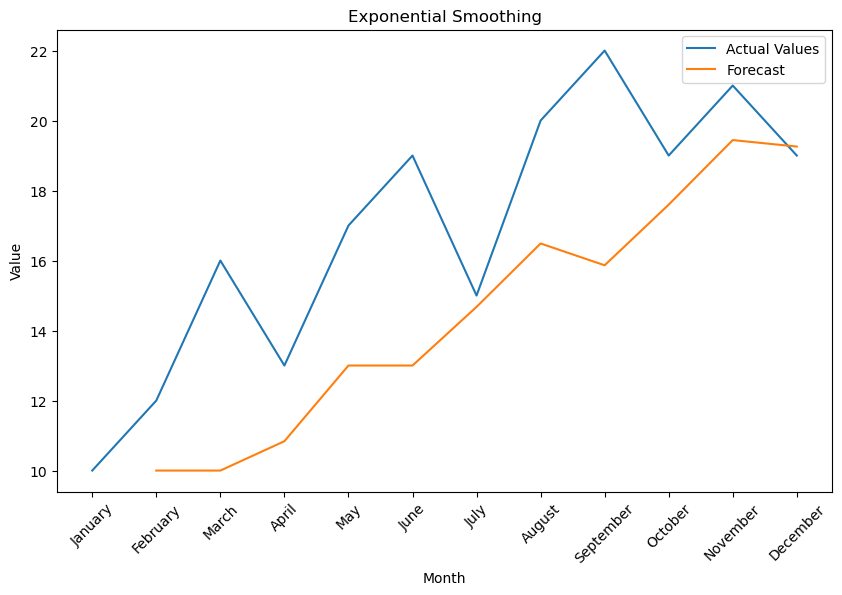

In [10]:
from statsmodels.tsa.api import SimpleExpSmoothing

# Set the value of alpha
alpha = 0.419

# Create a SimpleExpSmoothing object with the given data and alpha value
model = SimpleExpSmoothing(df['Value']).fit(smoothing_level=alpha, optimized=False)

# Get the forecast values and calculate the error metrics
df['Forecast'] = model.predict(start=0, end=len(df)-1)
df['Forecast'].iloc[0] = df['Value'].iloc[0]  # Set first forecasted value to actual value
df['Forecast'] = df['Forecast'].shift(1)  # Shift forecast by 1 period
df['Error'] = df['Value'] - df['Forecast']
df['Absolute Error'] = df['Error'].abs()
df['Squared Error'] = df['Error'] ** 2
df['Absolute Percent Error'] = (df['Absolute Error'] / df['Value']) * 100
mad = df['Absolute Error'].mean()
mse = df['Squared Error'].mean()
mape = df['Absolute Percent Error'].mean()

# Print the error metrics and the forecast error analysis table
print(f"MAD: {mad:.3f}")
print(f"MSE: {mse:.3f}")
print(f"MAPE: {mape:.2f}%")

table = df[['Month', 'Value', 'Forecast', 'Error', 'Absolute Error', 'Squared Error', 'Absolute Percent Error']]
print(table.to_string(index=False))

# Plot the actual values and the forecast
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['Month'], df['Value'], label='Actual Values')
ax.plot(df['Month'], df['Forecast'], label='Forecast')
ax.set_xlabel('Month')
ax.set_ylabel('Value')
ax.set_title('Exponential Smoothing')
plt.xticks(rotation=45)
ax.legend()
plt.show()

In [11]:
df

,Month,Value,Forecast,Error,Absolute Error,Squared Error,Absolute Percent Error
0,January,10,NaN,NaN,NaN,NaN,NaN
1,February,12,10.000000,2.000000,2.000000,4.000000,16.666667
2,March,16,10.000000,6.000000,6.000000,36.000000,37.500000
3,April,13,10.838000,2.162000,2.162000,4.674244,16.630769
4,May,17,13.000878,3.999122,3.999122,15.992977,23.524247
5,June,19,13.000510,5.999490,5.999490,35.993879,31.576263
6,July,15,14.676296,0.323704,0.323704,0.104784,2.158024
7,August,20,16.487928,3.512072,3.512072,12.334648,17.560359
8,September,22,15.864486,6.135514,6.135514,37.644529,27.888699
9,October,19,17.597267,1.402733,1.402733,1.967661,7.382808


# In-class exercise: Forecast of Predictive Analytics based on Google Trends

In [53]:
df = pd.read_csv('spring23-googletrend-prescriptiveanalytics.csv')

In [54]:
df.head()

,Month,Prescriptive analytics: (Worldwide)
0,2010-02,8
1,2010-03,7
2,2010-04,15
3,2010-05,9
4,2010-06,5


## TO DO: Adapt the code from the previous exercise to be able to visualize the Google Trends data

In [ ]:
'''
Output should look like this:

interactive(children=(Dropdown(description='k Value:', index=2, options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12…

<function __main__.plot_moving_average(k)>
'''

# Decomposition of a Time Series

Sandy Sawyer's family has been in the piano business for three generations. The Sawyers stock and sell a wide range of pianos, from console pianos to grand pianos. Sandy's father, who currently run the business, forecasts sales for different types of pianos each year by using his experience.

Although this forecasts have been reasonably good, Sandy (who is finishing up her prescriptive analytics course) is highly skeptical of such approach. She feels confident that she can develop a quantitative model that will do a much better job of forecasting piano sales.

To convince her father that she is correct, Sandy decides to develop a model to forecast sales for grand pianos. She hopes to show him how good the model could be in capturing patterns in past sales.

For this purpose, she collects sales data for the past five years, broken down by quarters each year. That is, she collects data for the past 20 quarters, as shown in the table below. 

| Period | Actual Value (Y) |
|--------|-----------------|
| Quarter 1 | 4 |
| Quarter 2 | 2 |
| Quarter 3 | 1 |
| Quarter 4 | 5 |
| Quarter 5 | 6 |
| Quarter 6 | 4 |
| Quarter 7 | 4 |
| Quarter 8 | 14 |
| Quarter 9 | 10 |
| Quarter 10 | 3 |
| Quarter 11 | 5 |
| Quarter 12 | 16 |
| Quarter 13 | 12 |
| Quarter 14 | 9 |
| Quarter 15 | 7 |
| Quarter 16 | 22 |
| Quarter 17 | 18 |
| Quarter 18 | 10 |
| Quarter 19 | 13 |
| Quarter 20 | 35 |


Because sales of gran pianos are seasonal and there has been an upward trend in sales each year, Sandy believes a decomposition model would be appropriate here. More specifically, she decides to use a **multiplicative** decomposition model.

# Decomposition of a Time Series with StatsModels Library

seasonal_decompose() is a function from the statsmodels library that decomposes a time series into its trend, seasonal, and residual components. The model parameter specifies whether the decomposition should be additive or multiplicative. The period parameter specifies the number of time steps in a complete seasonal cycle.

In [204]:
import pandas as pd

# Create a dictionary with the data
data = {
    'Period': ['Quarter 1', 'Quarter 2', 'Quarter 3', 'Quarter 4', 'Quarter 5', 'Quarter 6', 'Quarter 7', 'Quarter 8',
               'Quarter 9', 'Quarter 10', 'Quarter 11', 'Quarter 12', 'Quarter 13', 'Quarter 14', 'Quarter 15',
               'Quarter 16', 'Quarter 17', 'Quarter 18', 'Quarter 19', 'Quarter 20'],
    'Sales': [4, 2, 1, 5, 6, 4, 4, 14, 10, 3, 5, 16, 12, 9, 7, 22, 18, 10, 13, 35]
}

# Create the DataFrame
df = pd.DataFrame(data)

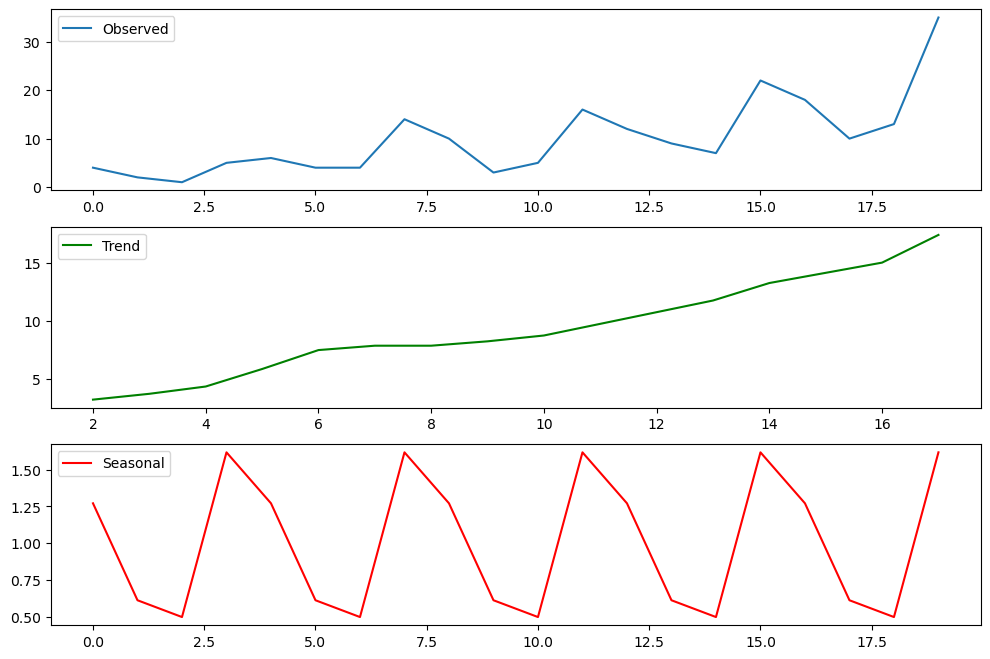

In [205]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Use the adjusted closing price for the analysis
data = df['Sales']

# Seasonal decomposition using the multiplicative model
decomposition = seasonal_decompose(data, model='multiplicative', period=4)#quarterly

# Plot the original data, trend, and seasonal components
plt.figure(figsize=(12, 8))

# Plot the original data
plt.subplot(3, 1, 1)
plt.plot(data, label='Observed')
plt.legend()

# Plot the trend component
plt.subplot(3, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='g')
plt.legend()

# Plot the seasonal component
plt.subplot(3, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal', color='r')
plt.legend()

plt.show()

# Forecasting: Facebook Prophet

Prophet is a widely used and highly regarded library for time-series forecasting in Python. It was developed by Facebook's Core Data Science team and is designed to handle a wide range of time-series data, including those with multiple seasonalities, trend changes, and outliers.

Prophet is also known for its ease of use and interpretability, with the ability to generate forecasts along with uncertainty intervals, and to decompose the time-series data into trend, seasonality, and holiday components. Additionally, Prophet allows users to incorporate external regressors, which can improve the accuracy of the forecasts.

In [ ]:
!python -m pip install prophet

19:41:13 - cmdstanpy - INFO - Chain [1] start processing
19:41:14 - cmdstanpy - INFO - Chain [1] done processing


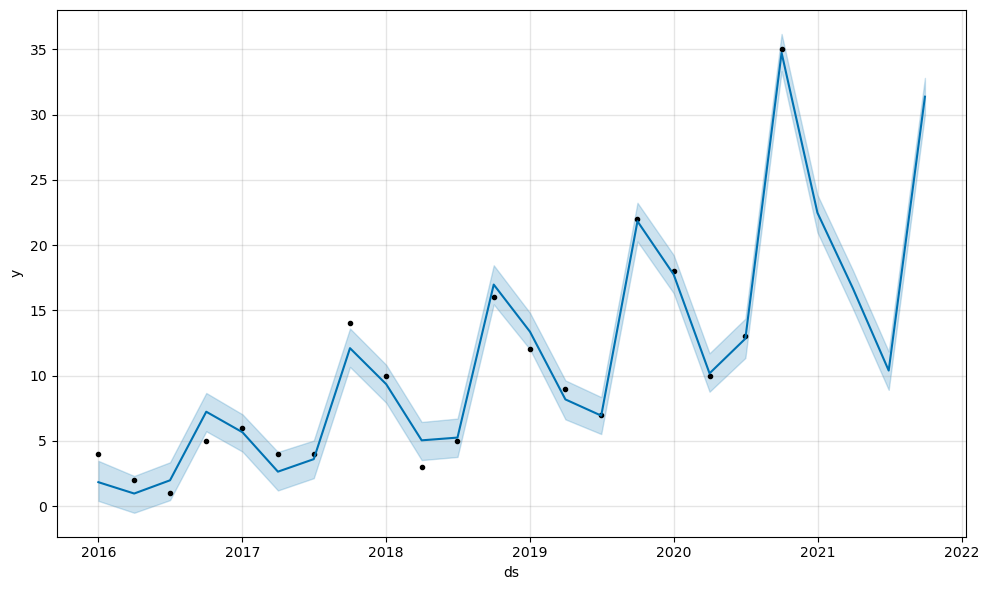

In [202]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Create a dictionary with the data
data = {
    'Period': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'y': [4, 2, 1, 5, 6, 4, 4, 14, 10, 3, 5, 16, 12, 9, 7, 22, 18, 10, 13, 35],
    'ds': pd.to_datetime(['2016-01-01', '2016-04-01', '2016-07-01', '2016-10-01', '2017-01-01', '2017-04-01',
                          '2017-07-01', '2017-10-01', '2018-01-01', '2018-04-01', '2018-07-01', '2018-10-01',
                          '2019-01-01', '2019-04-01', '2019-07-01', '2019-10-01', '2020-01-01', '2020-04-01',
                          '2020-07-01', '2020-10-01'])
}

# Create the DataFrame
df = pd.DataFrame(data)

# Create a Prophet model
m = Prophet(seasonality_mode='multiplicative', changepoint_prior_scale=0.01)

# Add quarterly seasonality
m.add_seasonality(name='quarterly', period=91.25, fourier_order=5)

# Fit the model to the data
m.fit(df)

# Make a dataframe to hold predictions
future = m.make_future_dataframe(periods=4, freq='Q')

# Make predictions
forecast = m.predict(future)

# Plot the forecast
fig1 = m.plot(forecast)

In [201]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
19,2020-10-01,34.740629,33.354302,36.194819
20,2020-12-31,22.482088,21.014721,23.993874
21,2021-03-31,16.687438,15.187325,18.204256
22,2021-06-30,10.384933,8.913635,11.862702
23,2021-09-30,31.374348,29.973190,32.826540


# Linear Regression in Python

In [3]:
!pip install statsmodels
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
lr = pd.read_csv('11-9_simpleregression_homeprice.csv')
# Import the statsmodels module

In [4]:
# Compute correlation of x and y
correlation = lr['IndependentVar_X'].corr(lr['DependentVar_y'])
print("The correlation between x and y is %4.2f" %(correlation))

# Add a constant to the DataFrame dfx
lrx = sm.add_constant(lr[['IndependentVar_X']])

# Regress y on dfx1
result = sm.OLS(lr['DependentVar_y'], lrx).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())


The correlation between x and y is 0.70
                            OLS Regression Results                            
Dep. Variable:         DependentVar_y   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     9.736
Date:                Thu, 27 Apr 2023   Prob (F-statistic):             0.0109
Time:                        13:17:40   Log-Likelihood:                -60.956
No. Observations:                  12   AIC:                             125.9
Df Residuals:                      10   BIC:                             126.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------


/Users/serena/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# Multiple Regression

In [215]:
mlr = pd.read_csv('11-9_multipleregression_homeprice.csv')

In [216]:
mlr.head()

,home_size,land_area,selling_price
0,2.01,0.40,182.5
1,2.65,0.60,227.3
2,2.43,0.65,251.9
3,2.89,1.10,325.2
4,2.55,0.75,225.1


In [217]:
# Add a constant to the DataFrame dfx
mlrx = sm.add_constant(mlr[['home_size','land_area']])

# Regress y on dfx1
result = sm.OLS(mlr['selling_price'], mlrx).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     31.91
Date:                Sat, 22 Apr 2023   Prob (F-statistic):           8.20e-05
Time:                        20:23:27   Log-Likelihood:                -52.491
No. Observations:                  12   AIC:                             111.0
Df Residuals:                       9   BIC:                             112.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.9193     48.807      2.047      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
